# DirectLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.16.2', '0.24.2', '0.11.1', '1.5.1']


## Test data
We create test data consisting of 6 variables.

In [2]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,1.657947,12.090323,3.519873,0.543405,10.182785,7.401408
1,1.217345,7.607388,1.693219,0.278369,8.758949,4.912979
2,2.226804,13.483555,3.201513,0.424518,15.398626,9.098729
3,2.756527,20.654225,6.037873,0.844776,16.795156,11.147294
4,0.319283,3.340782,0.727265,0.004719,2.343100,2.037974


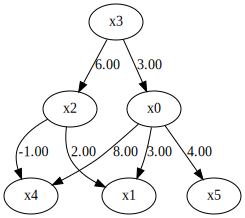

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

dot = make_dot(m)

# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

## Causal Discovery
To run causal discovery, we create a `DirectLiNGAM` object and call the `fit` method.

In [4]:
model = lingam.DirectLiNGAM()
model.fit(X)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [5]:
model.causal_order_

[3, 0, 2, 1, 4, 5]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [6]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  2.994,  0.   ,  0.   ],
       [ 2.995,  0.   ,  1.993,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  5.586,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.981,  0.   , -0.996,  0.   ,  0.   ,  0.   ],
       [ 3.795,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

We can draw a causal graph by utility funciton.

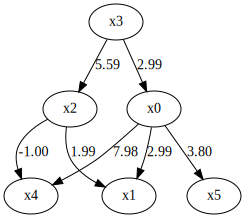

In [7]:
make_dot(model.adjacency_matrix_)

## Independence between error variables
To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables $e_i$ and $e_j$.

In [8]:
p_values = model.get_error_independence_p_values(X)
print(p_values)

[[0.    0.925 0.443 0.978 0.834 0.   ]
 [0.925 0.    0.133 0.881 0.317 0.214]
 [0.443 0.133 0.    0.    0.64  0.001]
 [0.978 0.881 0.    0.    0.681 0.   ]
 [0.834 0.317 0.64  0.681 0.    0.742]
 [0.    0.214 0.001 0.    0.742 0.   ]]
